In [249]:
# import 
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn import tree

In [250]:
# read in data file
pokemon = pd.read_csv('pokemon.csv')
pokemon

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1


In [226]:
import matplotlib.pyplot as plt #main plotting library
import seaborn as sns #prettier plotting library, based on matplotlib

<AxesSubplot:xlabel='type1', ylabel='base_total'>

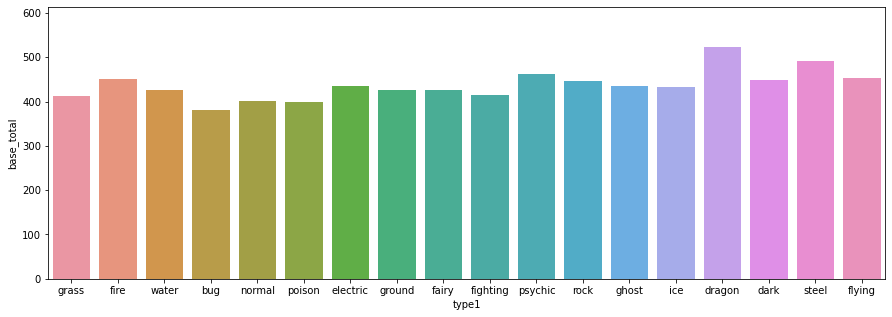

In [227]:
plt.figure(figsize=(15, 5))
sns.barplot(data=pokemon, x=pokemon["type1"], y=pokemon["base_total"], errwidth = 0)

In [228]:
pokemon["capture_rate"] = pokemon["capture_rate"].apply(lambda x : is_num(x))

In [229]:
pokemon["capture_rate"] = pokemon["capture_rate"].astype('float64')

In [230]:
pokemon.dtypes

abilities             object
against_bug          float64
against_dark         float64
against_dragon       float64
against_electric     float64
against_fairy        float64
against_fight        float64
against_fire         float64
against_flying       float64
against_ghost        float64
against_grass        float64
against_ground       float64
against_ice          float64
against_normal       float64
against_poison       float64
against_psychic      float64
against_rock         float64
against_steel        float64
against_water        float64
attack                 int64
base_egg_steps         int64
base_happiness         int64
base_total             int64
capture_rate         float64
classfication         object
defense                int64
experience_growth      int64
height_m             float64
hp                     int64
japanese_name         object
name                  object
percentage_male      float64
pokedex_number         int64
sp_attack              int64
sp_defense    

<AxesSubplot:xlabel='type1', ylabel='capture_rate'>

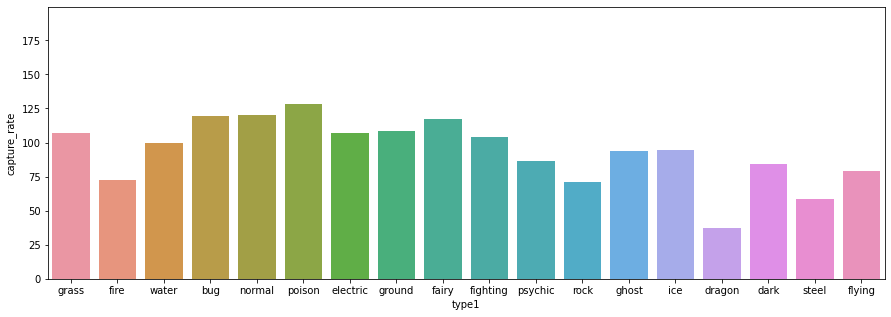

In [231]:
plt.figure(figsize=(15, 5))
sns.barplot(data=pokemon, x=pokemon["type1"], y=pokemon["capture_rate"], errwidth = 0)

<AxesSubplot:xlabel='is_legendary', ylabel='base_total'>

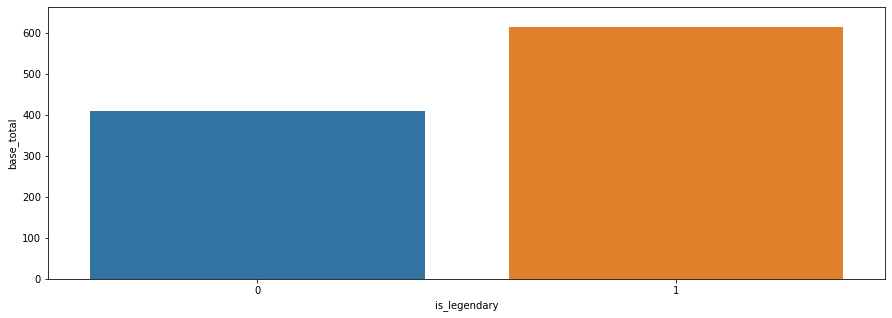

In [232]:
plt.figure(figsize=(15, 5))
sns.barplot(data=pokemon, x=pokemon["is_legendary"], y=pokemon["base_total"], errwidth = 0)

<AxesSubplot:xlabel='is_legendary', ylabel='capture_rate'>

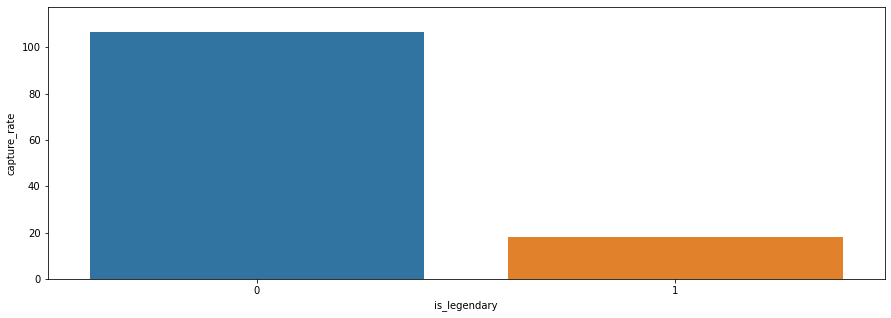

In [233]:
plt.figure(figsize=(15, 5))
sns.barplot(data=pokemon, x=pokemon["is_legendary"], y=pokemon["capture_rate"], errwidth = 0)

In [209]:
pokemon.dtypes

abilities             object
against_bug          float64
against_dark         float64
against_dragon       float64
against_electric     float64
against_fairy        float64
against_fight        float64
against_fire         float64
against_flying       float64
against_ghost        float64
against_grass        float64
against_ground       float64
against_ice          float64
against_normal       float64
against_poison       float64
against_psychic      float64
against_rock         float64
against_steel        float64
against_water        float64
attack                 int64
base_egg_steps         int64
base_happiness         int64
base_total             int64
capture_rate          object
classfication         object
defense                int64
experience_growth      int64
height_m             float64
hp                     int64
japanese_name         object
name                  object
percentage_male      float64
pokedex_number         int64
sp_attack              int64
sp_defense    

In [251]:
pokemon.isnull().sum()

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


In [252]:
pokemon["height_m"] = pokemon["height_m"].fillna(pokemon.groupby("type1")["height_m"].transform("mean"), inplace=False)
pokemon["weight_kg"] = pokemon["weight_kg"].fillna(pokemon.groupby("type1")["weight_kg"].transform("mean"), inplace=False)
pokemon["percentage_male"] = pokemon["percentage_male"].fillna(pokemon.groupby("type1")["percentage_male"].transform("mean"), inplace=False)
pokemon

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.100000,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.100000,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.100000,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.100000,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.100000,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,50.000000,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,58.978378,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,50.550000,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,51.058333,800,127,89,79,psychic,NaN,230.0,7,1


In [280]:
pokemon["height_m"]

0      0.7
1      1.0
2      2.0
3      0.6
4      1.1
      ... 
796    9.2
797    0.3
798    5.5
799    2.4
800    1.0
Name: height_m, Length: 801, dtype: float64

In [253]:
pokemon.groupby("type1")["height_m"].transform("mean")

0      0.938961
1      0.938961
2      0.938961
3      1.168000
4      1.168000
         ...   
796    1.875000
797    0.938961
798    1.296552
799    1.063462
800    1.875000
Name: height_m, Length: 801, dtype: float64

In [254]:
df = pokemon.drop(labels = ["abilities", "japanese_name", "generation", "pokedex_number", "name", "classfication", "type1", "type2"], axis = 1, inplace = False)
df

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,defense,experience_growth,height_m,hp,percentage_male,sp_attack,sp_defense,speed,weight_kg,is_legendary
0,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,49,1059860,0.7,45,88.100000,65,65,45,6.9,0
1,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,63,1059860,1.0,60,88.100000,80,80,60,13.0,0
2,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,123,1059860,2.0,80,88.100000,122,120,80,100.0,0
3,0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,43,1059860,0.6,39,88.100000,60,50,65,8.5,0
4,0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,58,1059860,1.1,58,88.100000,80,65,80,19.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,0.25,...,103,1250000,9.2,97,50.000000,107,101,61,999.9,1
797,1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,0.25,...,131,1250000,0.3,59,58.978378,59,31,109,0.1,1
798,2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,0.50,...,53,1250000,5.5,223,50.550000,97,53,43,888.0,1
799,2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,1.00,...,101,1250000,2.4,97,51.058333,127,89,79,230.0,1


In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   against_bug        801 non-null    float64
 1   against_dark       801 non-null    float64
 2   against_dragon     801 non-null    float64
 3   against_electric   801 non-null    float64
 4   against_fairy      801 non-null    float64
 5   against_fight      801 non-null    float64
 6   against_fire       801 non-null    float64
 7   against_flying     801 non-null    float64
 8   against_ghost      801 non-null    float64
 9   against_grass      801 non-null    float64
 10  against_ground     801 non-null    float64
 11  against_ice        801 non-null    float64
 12  against_normal     801 non-null    float64
 13  against_poison     801 non-null    float64
 14  against_psychic    801 non-null    float64
 15  against_rock       801 non-null    float64
 16  against_steel      801 non

In [256]:
def is_num(x):
    if x.isnumeric() == False:
        return 50
    else:
        return x

df["capture_rate"] = df["capture_rate"].apply(lambda x : is_num(x))

In [257]:
df["capture_rate"] = df["capture_rate"].astype('float64')

In [217]:
df = df.drop("base_egg_steps", axis = 1)

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   against_bug        801 non-null    float64
 1   against_dark       801 non-null    float64
 2   against_dragon     801 non-null    float64
 3   against_electric   801 non-null    float64
 4   against_fairy      801 non-null    float64
 5   against_fight      801 non-null    float64
 6   against_fire       801 non-null    float64
 7   against_flying     801 non-null    float64
 8   against_ghost      801 non-null    float64
 9   against_grass      801 non-null    float64
 10  against_ground     801 non-null    float64
 11  against_ice        801 non-null    float64
 12  against_normal     801 non-null    float64
 13  against_poison     801 non-null    float64
 14  against_psychic    801 non-null    float64
 15  against_rock       801 non-null    float64
 16  against_steel      801 non

In [234]:
X = df.loc[:, df.columns != "is_legendary"]
y = df["is_legendary"]

In [235]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=101)

In [236]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [237]:
scaler.fit(X_train)

StandardScaler()

In [238]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [239]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()

In [240]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [241]:
# accuracy score
tree_model.score(X_test, y_test)

0.991701244813278

In [247]:
tree_model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00645057, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.18383093,
       0.05667031, 0.69747402, 0.        , 0.        , 0.        ,
       0.01389354, 0.04168062, 0.        , 0.        , 0.        ,
       0.        ])

In [248]:
pd.DataFrame(tree_model.feature_importances_,X.columns,columns=['Coeff'])

,Coeff
against_bug,0.000000
against_dark,0.000000
against_dragon,0.000000
against_electric,0.000000
against_fairy,0.000000
against_fight,0.000000
against_fire,0.000000
against_flying,0.000000
against_ghost,0.006451
against_grass,0.000000


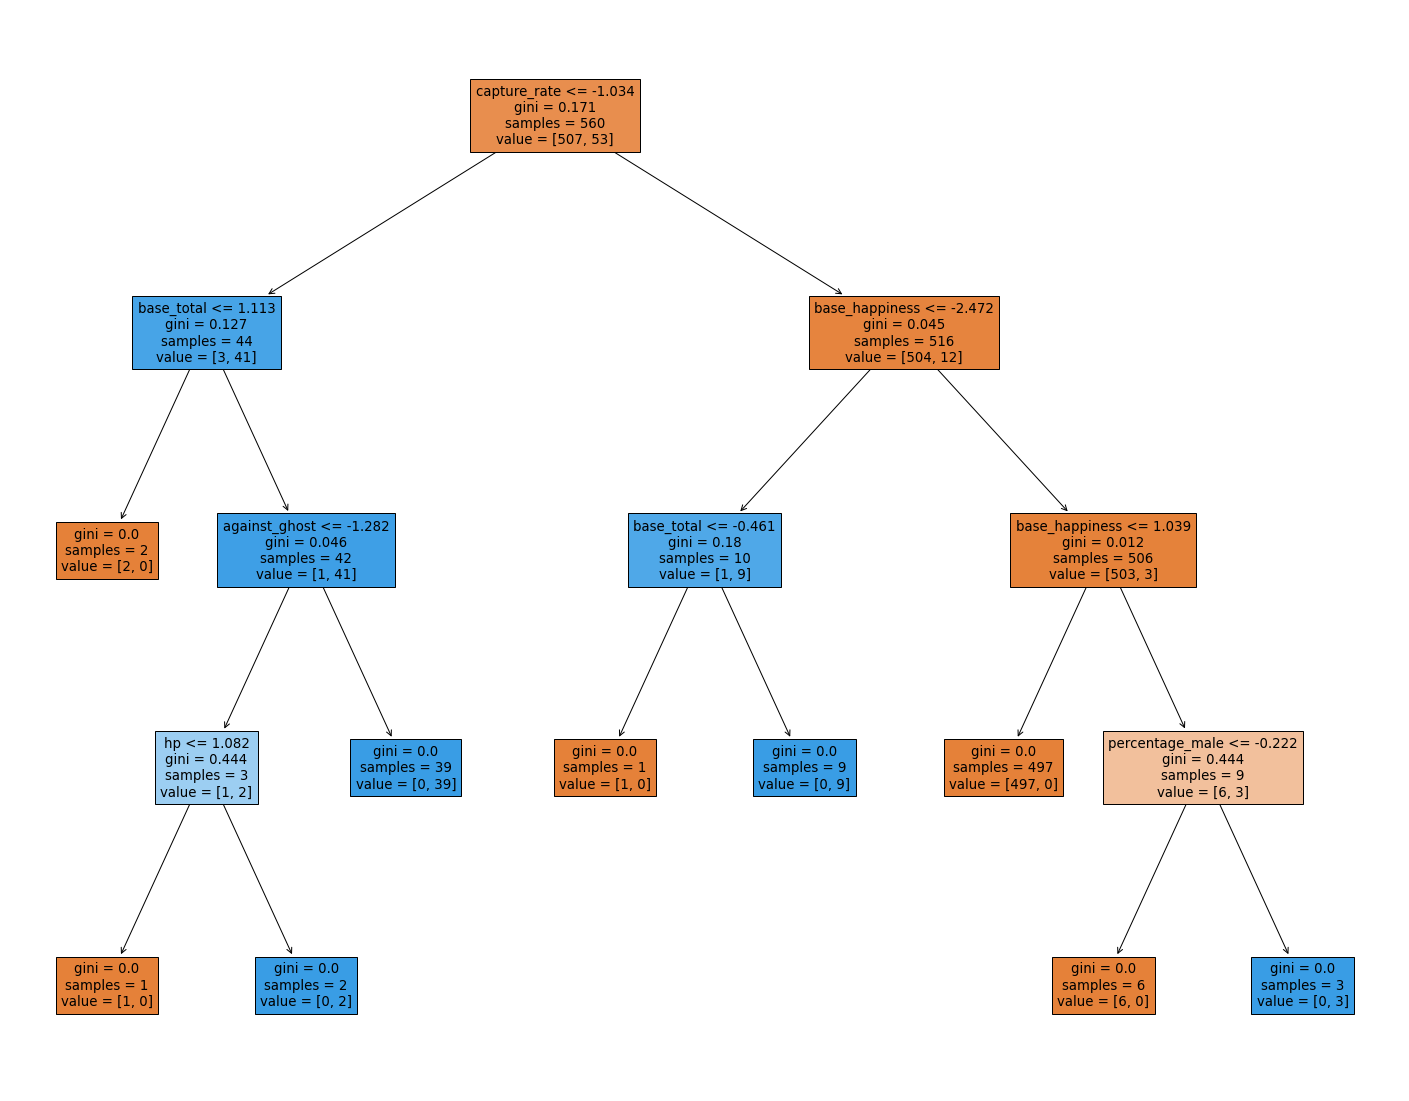

In [246]:
# visualize tree classifer
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_model, 
                   feature_names=df.columns,
                   max_depth=5,
                   filled=True)

In [ ]:
# given pokemon, see if it is legendary
predictions = tree_model.predict(X_test[3:4])
predictions # 0 if not legendary, 1 if legendary

In [260]:
# Linear Regression
X = df.loc[:, df.columns != "capture_rate"]
y = df["capture_rate"]

In [261]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=101)

In [262]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [263]:
scaler.fit(X_train)

StandardScaler()

In [264]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [282]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

In [283]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [284]:
linear_model.coef_

array([  2.57312729,   6.94614915,  -9.46458227,  -3.96753615,
         1.41366167,   0.49634239,  -1.31739895,  -3.30095803,
        -1.59866653,  -0.09807686,  -1.56921912,   1.92153512,
         6.08843217,  -7.35214684,   3.26133973,   0.03001797,
        -2.96179759,  -3.39686522,  -3.24493612,  -3.21447381,
        -2.95615882, -16.16952269, -11.6374188 ,   2.11062485,
         3.26995596, -15.86096416, -13.57552844, -11.20477624,
       -10.54788524, -13.06467049,  -1.78506555,   4.11740146])

In [285]:
pd.DataFrame(linear_model.coef_,X.columns,columns=['Coeff'])

,Coeff
against_bug,2.573127
against_dark,6.946149
against_dragon,-9.464582
against_electric,-3.967536
against_fairy,1.413662
against_fight,0.496342
against_fire,-1.317399
against_flying,-3.300958
against_ghost,-1.598667
against_grass,-0.098077


In [286]:
predictions = linear_model.predict(X_test)

In [287]:
from sklearn import metrics

mse = metrics.mean_squared_error(y_test, predictions)

rmse = np.sqrt(mse)

In [288]:
mse

3299.7881454768644

In [289]:
from sklearn.linear_model import Lasso, LassoCV

In [290]:
lasso_cv_model = LassoCV(eps=0.1, n_alphas=100, cv=5)

In [291]:
lasso_cv_model.fit(X_train, y_train)

LassoCV(cv=5, eps=0.1)

In [292]:
lasso_cv_model.coef_

array([  0.        ,   0.        ,  -0.        ,  -0.        ,
        -0.        ,  -0.        ,   0.        ,  -0.        ,
         0.        ,   0.        ,   0.        ,  -0.        ,
         0.        ,  -0.        ,  -0.        ,  -0.        ,
        -0.        ,  -0.        ,  -0.        ,  -0.        ,
        -0.        , -50.30799446,  -0.        ,   0.        ,
        -0.        ,  -0.71879053,  -8.46512552,  -0.        ,
        -0.        ,  -0.        ,  -0.        ,  -0.        ])

In [332]:
lasso_cv_model.intercept_

99.93571428571428

In [293]:
pd.DataFrame(lasso_cv_model.coef_,X.columns,columns=['Coeff'])

,Coeff
against_bug,0.000000
against_dark,0.000000
against_dragon,-0.000000
against_electric,-0.000000
against_fairy,-0.000000
against_fight,-0.000000
against_fire,0.000000
against_flying,-0.000000
against_ghost,0.000000
against_grass,0.000000


In [294]:
predictions = lasso_cv_model.predict(X_test)

In [295]:
from sklearn import metrics

mse = metrics.mean_squared_error(y_test, predictions)

rmse = np.sqrt(mse)

In [296]:
mse

3102.9517871682874

In [298]:
ridge_cv_model = RidgeCV(alphas=(0.1,1.0,10.0),cv=None, 
                         scoring='neg_root_mean_squared_error')

In [308]:
from sklearn.linear_model import RidgeCV

In [309]:
ridge_cv_model.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), scoring='neg_root_mean_squared_error')

In [310]:
pd.DataFrame(ridge_cv_model.coef_,X.columns,columns=['Coeff'])

,Coeff
against_bug,2.074288
against_dark,5.995498
against_dragon,-7.705844
against_electric,-3.138603
against_fairy,0.580404
against_fight,-0.033869
against_fire,-0.455998
against_flying,-3.296369
against_ghost,-1.406257
against_grass,-0.109910


In [312]:
predictions = ridge_cv_model.predict(X_test)

In [313]:
from sklearn import metrics

mse = metrics.mean_squared_error(y_test, predictions)

rmse = np.sqrt(mse)
mse

3273.0234998175033

In [321]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [322]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.3941908713692946


In [323]:
from sklearn import metrics

mse = metrics.mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)
mse

5264.535269709543

In [327]:
from sklearn.linear_model import ElasticNetCV

elastic_model = ElasticNetCV(l1_ratio= [.1, .5, .7,
    .9, .95, .99, 1])

In [328]:
elastic_model.fit(X_train, y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1])

In [330]:
predictions = elastic_model.predict(X_test)

In [331]:
from sklearn import metrics

mse = metrics.mean_squared_error(y_test, predictions)

rmse = np.sqrt(mse)
mse

3103.3369296640058